In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
def elliptical_wave(E_par,epsilon_par,E_per,epsilon_per):
    """
    E_par,epsilon_par: parallel direction amplitude and phase
    E_per,epsilon_per: perpendicular direction amplitude and phase
    """
    # first derive the Stokes Vectors
    I=E_par**2+E_per**2
    Q=E_par**2-E_per**2
    U=2*E_par*E_per*np.cos(epsilon_par-epsilon_per)
    V=2*E_par*E_per*np.sin(epsilon_par-epsilon_per)
    print('Stokes parameter', I, Q, U, V)
    
    
    # first derive the Trigonometric Wave parameters
    tan_2beta = V/np.sqrt(Q**2+U**2)
    beta = np.arctan(tan_2beta)/2.0
    print('beta',np.rad2deg(beta))
    if Q==0:
        chi = np.pi/4.0 if U>0 else 3.0*np.pi/4.0
    else:
        tan_2chi = (U/Q)
        if (tan_2chi >0) and (Q>0):
            chi = np.arctan(tan_2chi)/2
        elif (tan_2chi <0) and (Q<0):
            chi = (np.pi+np.arctan(tan_2chi))/2.0
        elif (tan_2chi >0) and (Q<0):
            chi = (np.pi+np.arctan(tan_2chi))/2.0
        elif (tan_2chi <0) and (Q>0):
            chi = (2.*np.pi+np.arctan(tan_2chi))/2.0
    
        
    print('chi',np.rad2deg(chi))
    # length of major and minor axes
    c = np.sqrt(I)
    E_ma = c*np.cos(beta)
    E_mi = c*np.sin(beta)
    print('E_ma,E_mi',E_ma, E_mi)
    E_ma_x = E_ma * np.cos(chi)
    E_ma_y = E_ma * np.sin(chi)
    
#     E_mi_x = E_mi * np.cos(chi-np.pi/2)
#     E_mi_y = E_mi * np.sin(chi-np.pi/2)
    E_mi_x = E_mi * np.sin(chi)
    E_mi_y = E_mi * (-np.cos(chi))
    
    # A1 and A2 vector
    A1_per=E_per*np.cos(epsilon_per)
    A1_par=E_par*np.cos(epsilon_par)
    
    A2_per=-E_per*np.sin(epsilon_per)
    A2_par=-E_par*np.sin(epsilon_par)
    
    
    omegat_pi4 = np.arange(0,np.pi*2,np.pi/4)
    omegat_pi4_text =[r'0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$']
    omegat_high= np.arange(0,np.pi*2+0.005,0.01)

    Epar = E_par * np.cos(omegat_high-epsilon_par)
    Eper = E_per * np.cos(omegat_high-epsilon_per)
    
    Epar_pi4 = E_par * np.cos(omegat_pi4-epsilon_par)
    Eper_pi4 = E_per * np.cos(omegat_pi4-epsilon_per)
    
    fig,ax = plt.subplots(figsize=[8,8])
    ax.plot(Epar,Eper,ls='dashed')
    ax.scatter(A1_par*np.cos(-omegat_pi4)+A2_par*np.sin(-omegat_pi4),\
               A1_per*np.cos(-omegat_pi4)+A2_per*np.sin(-omegat_pi4),marker='o',color='r',label='Par-Per system')
    ax.scatter(E_ma_x*np.sin(-omegat_pi4)+E_mi_x*np.cos(-omegat_pi4),\
               E_ma_y*np.sin(-omegat_pi4)+E_mi_y*np.cos(-omegat_pi4),marker='^',color='m',label='Ma-Mi system')
    
    for i in range(omegat_pi4.size):
        x,y=E_ma_x*np.sin(-omegat_pi4[i])+E_mi_x*np.cos(-omegat_pi4[i]),\
            E_ma_y*np.sin(-omegat_pi4[i])+E_mi_y*np.cos(-omegat_pi4[i]),
        ax.text(x,y,omegat_pi4_text[i],fontsize='large')
        ax.text(Epar_pi4[i],Eper_pi4[i],omegat_pi4_text[i],fontsize='large')
    ax.legend()
    ax.arrow(0, 0, 0.9, 0.0, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(0.05, 0.95,r'$\hat{e}  _{\bot }$',fontsize='x-large')
    ax.arrow(0, 0, 0.0, 0.9, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(0.95, -0.12,r'$\hat{e}  _{\parallel }$',fontsize='x-large')
    ax.set_xlim([-c,c])
    ax.set_ylim([-c,c])
    ax.plot([E_ma_x,-E_ma_x],[E_ma_y,-E_ma_y],ls='dotted',c='g')
    ax.plot([E_mi_x,-E_mi_x],[E_mi_y,-E_mi_y],ls='dotted',c='r')
    ax.arrow(0, 0, A1_par, A1_per, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, A2_par, A2_per, head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, E_ma_x, E_ma_y, head_width=0.05, head_length=0.1, fc='k', ec='m')
    ax.arrow(0, 0, E_mi_x, E_mi_y, head_width=0.05, head_length=0.1, fc='k', ec='m')
    
    
    
    
    style = "Simple, tail_width=0.5, head_width=4, head_length=8"
    kw = dict(arrowstyle=style, color="k")
    import matplotlib.patches as patches
    
    arrow1 = patches.FancyArrowPatch((0.2, 0.0), (0.2*np.cos(chi), 0.2*np.sin(chi)),
                             connectionstyle="arc3,rad=.5", **kw)
    ax.text(0.23*np.cos(chi/2.0), 0.23*np.sin(chi/2.0),r'$\chi$',fontsize='x-large')
    plt.gca().add_patch(arrow1)
    
    
    ax.plot([E_mi_x, E_ma_x],[E_mi_y, E_ma_y], ls='dotted',c='m')
    
    dl = E_ma*0.2
    dl_x,dl_y = dl*np.cos(chi),dl*np.sin(chi)
    
    Ema_minus_Emi_x = E_ma_x- E_mi_x
    Ema_minus_Emi_y = E_ma_y- E_mi_y
    end_x = E_mi_x + 0.8*Ema_minus_Emi_x
    end_y = E_mi_y + 0.8*Ema_minus_Emi_y
    arrow2 = patches.FancyArrowPatch((E_ma_x-dl_x, E_ma_y-dl_y), (end_x,end_y),
                              **kw)
    
    ax.text(end_x,end_y,r'$\beta$',fontsize='x-large')
    plt.gca().add_patch(arrow2)
    
    plt.show()
    plt.savefig('elliptical_plot.png',dpi=300)
    print('------------- sainty check ---------------')
    print('c^2, a_par^2+a_per^2',c**2, E_ma**2+E_mi**2)
    print('a_par^2-a_per^2',E_par**2-E_per**2, c**2*np.cos(2*beta)*np.cos(2*chi))
    print('a_par^2-a_per^2',2*E_par*E_per*np.cos(epsilon_par-epsilon_per), c**2*np.cos(2*beta)*np.sin(2*chi))
    print('a_par^2-a_per^2',2*E_par*E_per*np.sin(epsilon_par-epsilon_per), c**2*np.sin(2*beta))
    

Stokes parameter 1.81 0.18999999999999995 -0.8999999999999996 1.55884572681199
beta 29.728089524423613
chi 140.96036926996115
E_ma,E_mi 1.16829725285815 0.6671443089497956


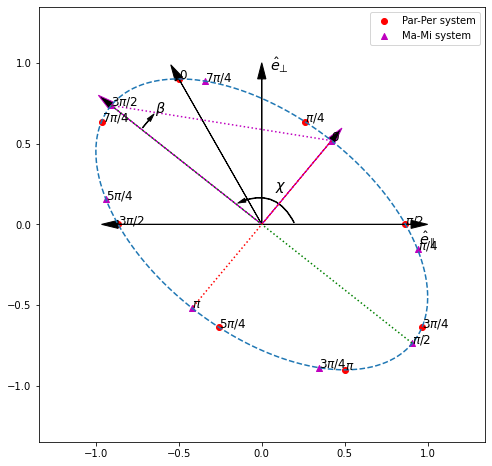

------------- sainty check ---------------
c^2, a_par^2+a_per^2 1.8100000000000003 1.8100000000000003
a_par^2-a_per^2 0.18999999999999995 0.1899999999999996
a_par^2-a_per^2 -0.8999999999999996 -0.8999999999999999
a_par^2-a_per^2 1.55884572681199 1.55884572681199


<Figure size 432x288 with 0 Axes>

In [53]:
elliptical_wave(1.0,2*np.pi/3,0.9,0)

In [15]:
k,w=0.5,1.5
x=np.linspace(-10,10,1000)
t=np.linspace(0,5,1000)
c = []
for tt in t:
    for xx in x:
        c.append(np.cos(k*xx-w*tt))
c=np.array(c).reshape(t.size,x.size)

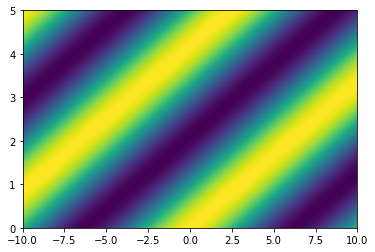

In [16]:
fig,ax=plt.subplots()
ax.pcolormesh(x,t,c)

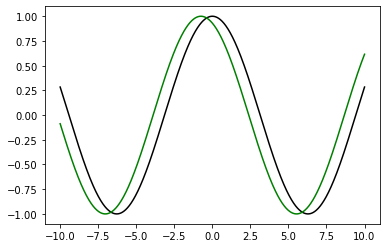

In [14]:
fig,ax=plt.subplots()
ax.plot(x,c[0,:],c='k')
ax.plot(x,c[50,:],c='g')

In [18]:
np.rad2deg(np.arccos(0.5))

59.99999999999999

In [55]:
np.tan(6*np.pi/8)

-1.0000000000000002